   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


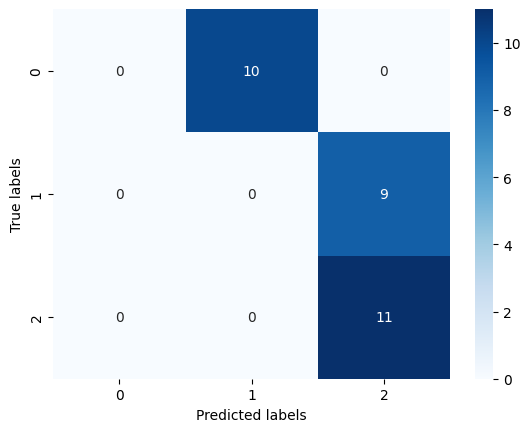

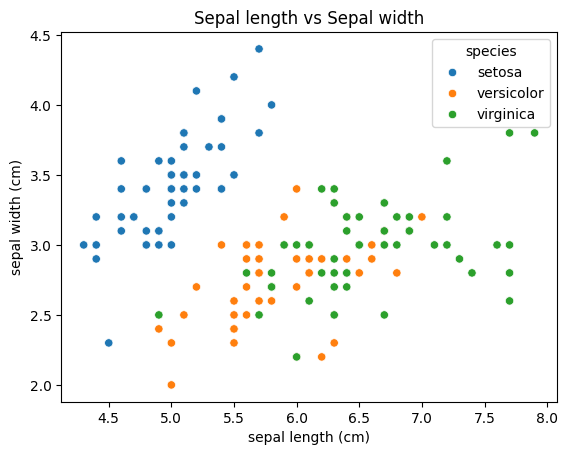

In [8]:
# install scikit-learn
!pip install scikit-learn

# Importing the load_iris function from the sklearn.datasets module
from sklearn.datasets import load_iris

# Loading the Iris dataset using the load_iris function
iris = load_iris()

# Importing pandas library as pd
import pandas as pd

# Convert the Iris dataset to a DataFrame for easier exploration
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding a new column 'species' to the DataFrame with the target species names
iris_df['species'] = iris.target_names[iris.target]

# Exploring the data
print(iris_df.head()) # Check the first few rows
print(iris_df.describe()) # Summary statistics
print(iris_df['species'].value_counts()) # Check class distribution

# Checking correlation between each column
iris_corr = iris_df.corr(numeric_only=True)
iris_corr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting the data into features and target
X = iris.data
y = iris.target

# Encoding the categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Example prediction
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example data
predicted_class = model.predict(new_data)
print("Predicted class:", iris.target_names[predicted_class][0])

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Scatter plot
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Sepal length vs Sepal width')
plt.show()

# Example of hyperparameter tuning
model_tuned = LogisticRegression(max_iter=1000)  # Adjusting max_iter
model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)
